<a href="https://colab.research.google.com/github/ioloi1128/CDA/blob/main/CDA_week10_1_EOF_partIV_prec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy
!pip install xarray
!pip install matplotlib
!pip install scipy
!pip install pandas

!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy

!apt-get -V -y -qq install python-cartopy python3-cartopy
!pip uninstall shapely -y
!pip install shapely --no-binary shapely

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (4.9.3-2).
libproj-dev set to manually installed.
proj-data is already the newest version (4.9.3-2).
proj-data set to manually installed.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 32.3 kB of archives.
After this operation, 110 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 32.3 kB in 1s (40.9 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 155455 files and directories currently installed.)
Preparing to unpack .../proj-bin_4.9.3-2_amd64.deb ...
Unpacking proj-bin (4.9.3-2) ...
Setting up proj-bin (4.9.3-2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Reading package lists... Done
Building dependency tree       
Reading state

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [3]:
!pip install eofs
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from eofs.xarray import Eof
from eofs.examples import example_data_path

     |████████████████████████████████| 1.0 MB 4.2 MB/s 
  Created wheel for eofs: filename=eofs-1.4.0-py3-none-any.whl size=1100374 sha256=3936ceff8ec7056728ebc5d45ef6fc371c254aaa245435c86491ceee0022fd26
  Stored in directory: /root/.cache/pip/wheels/ce/4e/36/2ef48d7342cd326d5f3bdb4ddd0441f06b387b5cbfc8336095
Successfully built eofs


In [5]:
#read precipitation
#url = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/gpcp/precip.mon.mean.nc'
#ds_prec = xr.open_dataset(url)

ds_prec = xr.open_dataset("/content/drive/MyDrive/Colab_data/GPCP_V2.3_197901-202203.nc")

ds_prec = ds_prec.sel(time=slice('1979', '2019'))
ds_prec.load()
ds_prec

<xarray.Dataset>
Dimensions:    (lat: 72, lon: 144, nv: 2, time: 492)
Coordinates:
  * lat        (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon        (lon) float32 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2019-12-01
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-01-01
    lat_bnds   (lat, nv) float32 -90.0 -87.5 -87.5 -85.0 ... 85.0 87.5 87.5 90.0
    lon_bnds   (lon, nv) float32 0.0 2.5 2.5 5.0 5.0 ... 355.0 357.5 357.5 360.0
    precip     (time, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.1305 0.1327 0.1341
Attributes: (12/18)
    Conventions:           CF-1.0
    curator:               Dr. Jian-Jian Wang\nESSIC, University of Maryland ...
    citation:              Adler, R.F., G.J. Huffman, A. Chang, R. Ferraro, P...
    title:                 GPCP Version 2.3 Combined Precipitation Dataset (F...
    platform:              NOAA POES (Polar Orbiting Environmental Satellites)
    source_obs:            CDR RSS SSMI/SSMIS Tbs over ocean \nCDR SSMI/SSMIS...
    ...                    ...
    source:                https://www.ncei.noaa.gov/data/global-precipitatio...
    source_documentation:  https://www.ncdc.noaa.gov/cdr/atmospheric/precipit...
    NCO:                   4.6.9
    history:               Generated at NOAA/ESRL PSD Sep 9 2016 based on dat...
    References:            http://www.psl.noaa.gov/data/gridded/data.gpcp.html
    data_comment:          Interim data covers 2022/02 through latest.

In [6]:
#ds_prec = ds_prec.sel(time=slice('1979', '2019'))


ds_climo=ds_prec.groupby('time.month').mean()
ds_anoms=ds_prec.groupby('time.month')-ds_climo
ds_anoms

#ds_anoms=ds_anoms.reindex(lat=list(reversed(ds_anoms['lat'])))
#ds_prec=ds_anoms.sel(lat=slice(10,60),lon=slice(90,150))


<xarray.Dataset>
Dimensions:   (lat: 72, lon: 144, nv: 2, time: 492)
Coordinates:
  * lat       (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon       (lon) float32 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * time      (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2019-12-01
    month     (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: nv
Data variables:
    lat_bnds  (time, lat, nv) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    lon_bnds  (time, lon, nv) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    precip    (time, lat, lon) float32 -0.02191 -0.03154 ... -0.2816 -0.2292

In [7]:
ds_prec=ds_anoms.sel(lat=slice(10,60),lon=slice(90,150))

In [8]:
print(ds_prec)

<xarray.Dataset>
Dimensions:   (lat: 20, lon: 24, nv: 2, time: 492)
Coordinates:
  * lat       (lat) float32 11.25 13.75 16.25 18.75 ... 51.25 53.75 56.25 58.75
  * lon       (lon) float32 91.25 93.75 96.25 98.75 ... 141.2 143.8 146.2 148.8
  * time      (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2019-12-01
    month     (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: nv
Data variables:
    lat_bnds  (time, lat, nv) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    lon_bnds  (time, lon, nv) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    precip    (time, lat, lon) float32 -0.6562 -0.8603 ... -0.3966 -0.562


In [9]:
ds_prec = ds_prec.sel(time=ds_prec.time.dt.month.isin([7,8,9])) #JJA
#ds_prec_avg = ds_prec.mean(dim=('time'))
prec = ds_prec['precip']
prec

<xarray.DataArray 'precip' (time: 123, lat: 20, lon: 24)>
array([[[ 2.47828865e+00,  4.05725384e+00,  3.55538559e+00, ...,
         -1.38610220e+00, -1.94812059e+00, -2.19089556e+00],
        [ 1.56571388e-01,  3.45681286e+00, -8.45699310e-02, ...,
         -1.42891598e+00, -1.80676675e+00, -1.91958952e+00],
        [-4.40310287e+00, -1.29518318e+00, -1.83796883e+00, ...,
         -7.01167583e-01, -7.53345013e-01, -3.94434929e-01],
        ...,
        [-8.10929418e-01, -6.86479568e-01, -1.12601066e+00, ...,
          1.07502401e+00,  6.06008530e-01,  5.15136957e-01],
        [ 1.15013123e-03, -3.38950157e-01, -8.67515922e-01, ...,
          5.42869806e-01,  5.36376238e-01,  6.58524513e-01],
        [-1.81392074e-01, -1.28890038e-01, -4.81063008e-01, ...,
         -9.31442499e-01, -1.52802944e-01,  2.46577501e-01]],

       [[-4.99388647e+00, -6.56088734e+00, -4.19717264e+00, ...,
         -4.86280775e+00, -2.92462778e+00,  1.74438477e-01],
        [-3.70238495e+00, -5.11212254e+00, -3.72914600e+00, ...,
         -4.68473959e+00, -3.38829994e+00, -8.27828407e-01],
        [-2.75329018e+00,  3.45961189e+00,  4.05987930e+00, ...,
         -1.85808802e+00, -1.80718517e+00, -9.95131493e-01],
...
         -8.45207334e-01, -1.42935073e+00, -1.43143034e+00],
        [-4.29556370e-02, -1.92692757e-01,  6.86380863e-02, ...,
         -7.34619975e-01, -1.18522418e+00, -1.07202017e+00],
        [ 4.68463659e-01, -7.08284378e-02, -6.94230676e-01, ...,
         -6.20025396e-01, -6.30717516e-01, -3.14518690e-01]],

       [[ 3.47141361e+00,  5.44824123e+00,  1.05233097e+00, ...,
          2.46444225e+00,  5.92556286e+00,  6.43895054e+00],
        [ 3.62269306e+00,  4.36465454e+00,  1.66273308e+00, ...,
          3.48330688e+00,  5.95826674e+00,  2.30027390e+00],
        [ 1.74351025e+00,  3.64190102e+00,  2.63249397e+00, ...,
          5.17293310e+00,  4.86011362e+00,  2.16453552e-01],
        ...,
        [ 1.90734863e-02,  6.55327559e-01, -1.57215714e-01, ...,
          2.56548166e-01,  1.44625425e-01, -2.59354830e-01],
        [ 2.40937352e-01,  1.11235857e-01, -5.29958010e-02, ...,
          1.14741063e+00,  8.92769814e-01,  5.39083004e-01],
        [-2.83741117e-01, -2.91065693e-01, -3.70982647e-01, ...,
          1.44447613e+00,  1.21553016e+00,  7.57426739e-01]]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 11.25 13.75 16.25 18.75 ... 51.25 53.75 56.25 58.75
  * lon      (lon) float32 91.25 93.75 96.25 98.75 ... 141.2 143.8 146.2 148.8
  * time     (time) datetime64[ns] 1979-07-01 1979-08-01 ... 2019-09-01
    month    (time) int64 7 8 9 7 8 9 7 8 9 7 8 9 7 ... 7 8 9 7 8 9 7 8 9 7 8 9

In [10]:
# Create an EOF solver to do the EOF analysis. Square-root of cosine of
# latitude weights are applied before the computation of EOFs.
coslat = np.cos(np.deg2rad(prec.coords['lat'].values))
wgts = np.sqrt(coslat)[..., np.newaxis]
solver = Eof(prec, weights=wgts)

# Retrieve the leading EOF, expressed as the correlation between the leading
# PC time series and the input SST anomalies at each grid point, and the
# leading PC time series itself.
eofs = solver.eofsAsCorrelation(neofs=4)
#eofs = solver.eofsAsCovariance(neofs=4)
#eofs = solver.eofs(neofs=4)
pcs = solver.pcs(npcs=4, pcscaling=1)
vars = solver.varianceFraction(neigs=4)

In [11]:
vars

<xarray.DataArray 'variance_fractions' (mode: 4)>
array([0.18724129, 0.07915679, 0.06467963, 0.06335687], dtype=float32)
Coordinates:
  * mode     (mode) int64 0 1 2 3
Attributes:
    long_name:  variance_fractions

/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


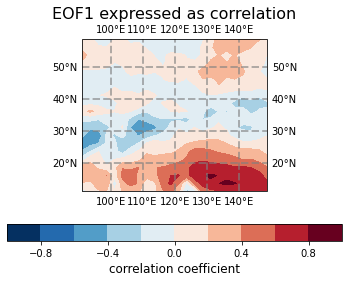

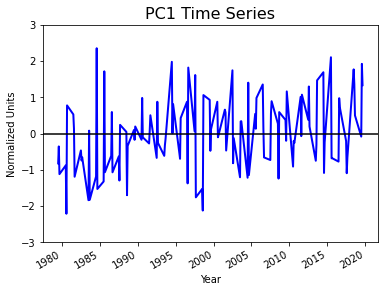

In [12]:
import cartopy.feature as cfeature
# Plot the leading EOF expressed as correlation in the Pacific domain.
clevs = np.linspace(-1, 1, 11)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=120))
fill = eofs[0].plot.contourf(ax=ax, levels=clevs, cmap=plt.cm.RdBu_r,
                             add_colorbar=False, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')
cb = plt.colorbar(fill, orientation='horizontal')
cb.set_label('correlation coefficient', fontsize=12)
ax.set_title('EOF1 expressed as correlation', fontsize=16)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.6, linestyle='--')
# Plot the leading PC time series.
plt.figure()
pcs[:, 0].plot(color='b', linewidth=2)
ax = plt.gca()
ax.axhline(0, color='k')
ax.set_ylim(-3, 3)
ax.set_xlabel('Year')
ax.set_ylabel('Normalized Units')
ax.set_title('PC1 Time Series', fontsize=16)

plt.show()

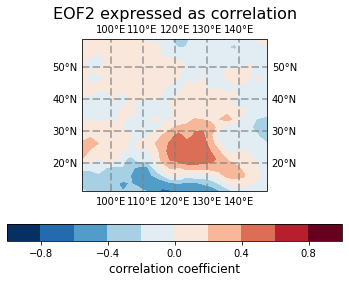

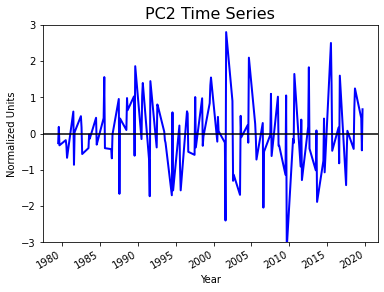

In [13]:
import cartopy.feature as cfeature
# Plot the leading EOF expressed as correlation in the Pacific domain.
clevs = np.linspace(-1, 1, 11)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=120))
fill = eofs[1].plot.contourf(ax=ax, levels=clevs, cmap=plt.cm.RdBu_r,
                             add_colorbar=False, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')
cb = plt.colorbar(fill, orientation='horizontal')
cb.set_label('correlation coefficient', fontsize=12)
ax.set_title('EOF2 expressed as correlation', fontsize=16)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.6, linestyle='--')
# Plot the leading PC time series.
plt.figure()
pcs[:, 1].plot(color='b', linewidth=2)
ax = plt.gca()
ax.axhline(0, color='k')
ax.set_ylim(-3, 3)
ax.set_xlabel('Year')
ax.set_ylabel('Normalized Units')
ax.set_title('PC2 Time Series', fontsize=16)

plt.show()